# open3d.org Tutorial
This notebook is on the official tutorial for open3d. I will attempt my best to explain what each lil thing does

## §1 Pointcloud basics

In [1]:
#Read a point cloud and visualize it
print('Load a ply point cloud, print it, and render it') #print what is inside the arg
#btw, a PLY file stands for Polygon File Format which is used to store 3D data points.

Load a ply point cloud, print it, and render it


In [2]:
import open3d as o3d #import library under given alias. open3d library works with 3d point clouds

ply_point_cloud=o3d.data.PLYPointCloud() #access pregot pointcloud data?

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


o3d.data is a module used to access common 3D data and examples that can be used for testing, experimenting, and learning.

o3d.data.PLYPointCloud() gives access pre-defined point cloud data directly from the library.

In [6]:
pcd = o3d.io.read_point_cloud(ply_point_cloud.path) #get pc data of the 'ply_point_cloud.path' file? and store it in
#var 'pcd'
#idk what .path means

NameError: name 'o3d' is not defined

o3d.io = module with func to read and write in 3d data formats eg pointclouds triagle meshs and voxel grids, wtvr that is. io stands for input output

o3d.io.read_point_coud() = function in io module where it reads a pointcloud specified in arg, and returns a PointCloud object of that data

In [7]:
print(type(ply_point_cloud)) #print the type of objects pcd and ply_point_cloud are
print(type(pcd))
print(type(pcd.points)) #i dont know what the .points extension does to change the data in 'pcd'
print(type([pcd])) #i think the [] turns pcd into a list somehow

NameError: name 'ply_point_cloud' is not defined

In [8]:
print(pcd) #when used on a pointcloud object, the print function outputs the size of the data file, it does not
#visualize it

NameError: name 'pcd' is not defined

In [9]:
import numpy as np #import numpy library under the alias of 'np'

print(np.asarray(pcd.points)) # print the array created from the pcd.points data

NameError: name 'pcd' is not defined

np.asarray() is a numpy function used to convert input data into an array of some kind. called asaray because 'as array' :) 

the .points extension was added to the pcd data in order to ?????????????

In [ ]:
o3d.visualization.draw_geometries([pcd]) #display the pointcloud data stored in var pcd.

[image.png]
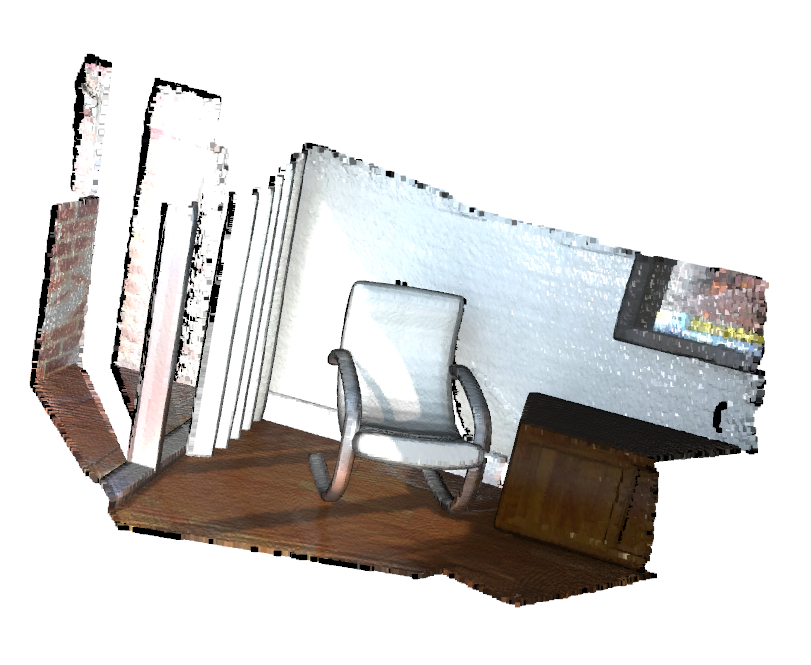

o3d.visualization=module that provides visualization cabalilities for 3d data
.draw_geometries=function used to display 3d geometry og data. the input must be of data type 'list'
you can convert pcd, 


In [10]:
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])
#the parameters here i guess are just misc settings the user wants

NameError: name 'o3d' is not defined

### Voxel downsampling

voxel=3d pixel, voxel is portmanteau of volume+pixel, voxels are cubes

Voxel downsampling uses a regular voxel grid to create a uniformly downsampled point cloud from an input point cloud. It is often used as a pre-processing step for many point cloud processing tasks. The algorithm operates in two steps:
- Points are bucketted into voxels
- Each occupeied voxel generates 1 point by averaging all poiints inside it

In [11]:
print('Downsample the point cloud with a voxel of 0.05')

Downsample the point cloud with a voxel of 0.05


In [12]:
downpcd = pcd.voxel_down_sample(voxel_size=0.05) #create a downsampled point cloud of the pointcloud 'pcd' using voxels


NameError: name 'pcd' is not defined

The 'voxel_size' param in 'pcd.voxel_down_sample()' is a quantity of the length of the edge of a voxel. the units are the same as the units used to represent the 3d coords of the original point cloud data

In [13]:
print(pcd.get_max_bound()) #get the coord of the farthest point from the origin
print(pcd.get_min_bound()) #get the coord of the nearest point from the origin

NameError: name 'pcd' is not defined

In [14]:
o3d.visualization.draw_geometries([downpcd]) #display the pointcloud data stored in var downpcd

NameError: name 'o3d' is not defined

![image.png]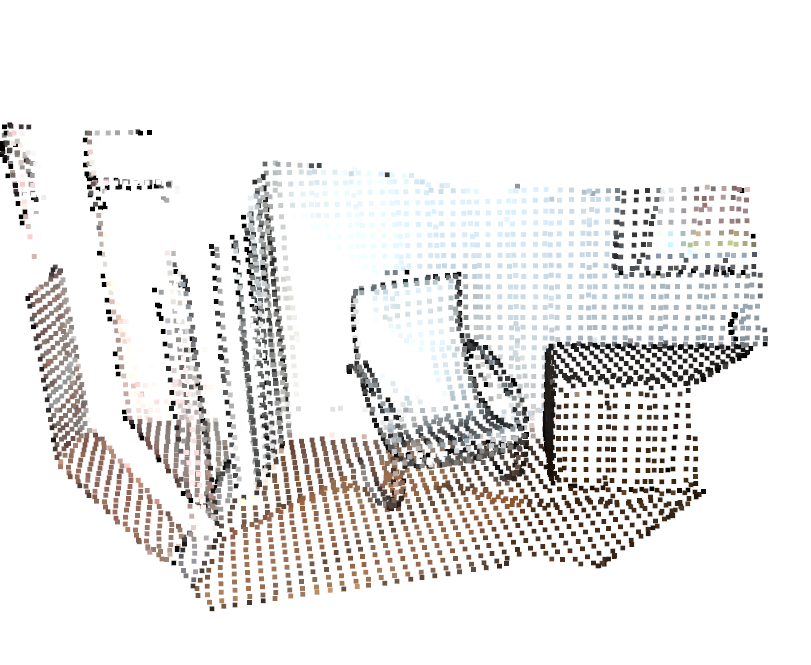

### <font color='red'>REVISIT!<font> <font color='black'>Vertex normal estimation<font> <font color='red'>REVISIT!<font>


Whilst you are displaying a pointcloud, as you did above, you can press the 'N' key to see all normal vectors of each data point. You can use the keys '-' and '+' to contro.l the length of these vectors

![image.png]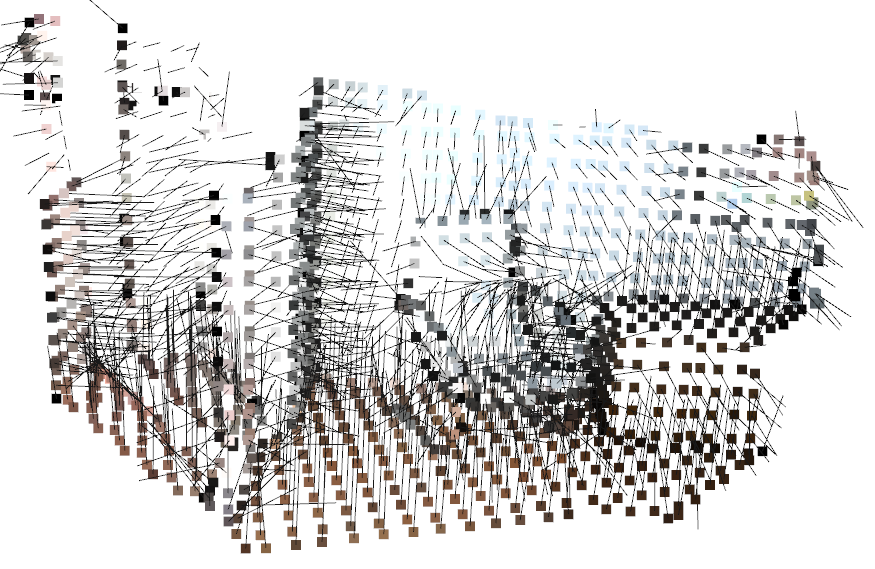

In [15]:
print('Recompute the normal of the downsampled pointcloud')

Recompute the normal of the downsampled pointcloud


In [16]:
downpcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

NameError: name 'downpcd' is not defined

In [17]:
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024],
                                  point_show_normal=True)

NameError: name 'o3d' is not defined

### Access estimated vertex normal

Estimated normal vectors can be retrieved from the 'normals' variable of 'downpcd'

In [18]:
print('Print a normal vector of the 0th point')
print(downpcd.normals[0])

Print a normal vector of the 0th point


NameError: name 'downpcd' is not defined

To see other variables of the pointcloud, o help(downpcd)

In [19]:
help(downpcd)

NameError: name 'downpcd' is not defined

Normal vectors can be transformed as a numpy array uing np.asarray

In [20]:
print('Print the normal vectors of the first 10 points')
print(np.asarray(downpcd.normals)[:10, :])

Print the normal vectors of the first 10 points


NameError: name 'downpcd' is not defined

### <font color='red'>REVISITed!<font> <font color='black'>Crop point cloud<font> <font color='red'>REVISITed, kinda!<font> <font color='black'>(3/5)<font>

In [41]:
print('Load a polygon volume and use it to crop the original cloud')

Load a polygon volume and use it to crop the original cloud


In [42]:
demo_crop_data=o3d.data.DemoCropPointCloud()#I cannot find what this function does, crops the pc? but how? and what region?
#I think DemoCropPointCloud() is a function made specifically for this one demo so we can start p[laying with the cropping
#functionality of pointcloud

o3d.data = module that provides acces to pre-downloaded sample data and demos.

o3d.data.demoCropPointCloud() = idk

In [43]:
pcd = o3d.io.read_point_cloud(demo_crop_data.point_cloud_path) #read point cloud 'demo_crop_data.point_cloud_path'
o3d.visualization.draw_geometries([pcd])#show this new pointcloud

In [44]:
vol = o3d.visualization.read_selection_polygon_volume(demo_crop_data.cropped_json_path)
#i don't know what this line does, I think demo_crop_data thing is a premade polygon volume file.

In [45]:
chair = vol.crop_point_cloud(pcd)
#so i think this creats a point cloud of all the points in the aforementionted polygon volume file

In [46]:
o3d.visualization.draw_geometries([chair])#show this new pointcloud

### Paint point cloud

In [47]:
print("Paint chair")
chair.paint_uniform_color([1, 1, 0.7]) #rgb values
o3d.visualization.draw_geometries([chair],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

Paint chair


### <font color='red'>REVISIT!<font> <font color='black'>Point cloud distance<font> <font color='red'>REVISIT!<font> Here I start skimming, i need to do stuff 

compute_point_cloud_distance= given 2 subpointclouds, calculate the nearest distance using the 2 closest points from each cloud. It computes for each point in the source point cloud the distance to the closest point in the target point cloud.

In [48]:
demo_crop_data=o3d.data.DemoCropPointCloud()
print(type(demo_crop_data))

<class 'open3d.cpu.pybind.data.DemoCropPointCloud'>


The DemoCropPointCloud is a custom class created for the purpose of the demo. It's not a pointcloud, but an object containing info about the pre-made data delated to the polygon volume and associated point cloud for the demo

In [49]:
pcd = o3d.io.read_point_cloud(demo_crop_data.point_cloud_path)
vol = o3d.visualization.read_selection_polygon_volume(demo_crop_data.cropped_json_path)
chair = vol.crop_point_cloud(pcd)

In [50]:
dists = pcd.compute_point_cloud_distance(chair) #compute point-point distances between 'pcd' and 'chair'
print(type(dists))
dists = np.asarray(dists) #convert that data into a numpy array
print(type(dists))
ind = np.where(dists > 0.01)[0] #
pcd_without_chair = pcd.select_by_index(ind)
o3d.visualization.draw_geometries([pcd_without_chair])


<class 'open3d.cpu.pybind.utility.DoubleVector'>
<class 'numpy.ndarray'>


In [51]:
print(dists)

[1.82659798 1.83171046 1.817216   ... 0.27083108 0.27181889 0.27301031]


In [52]:
print(type(dists))

<class 'numpy.ndarray'>


### <font color='red'>REVISIT!<font> <font color='black'>Bounding volumes<font> <font color='red'>REVISIT!<font>

In [53]:
aabb = chair.get_axis_aligned_bounding_box() #box is aligned with one of the 3 cartesian axis
aabb.color = (1, 0, 0) #rgb colors
obb = chair.get_oriented_bounding_box() # #best fit box on point clouds
obb.color = (0, 1, 0) #rgb colors
o3d.visualization.draw_geometries([chair, aabb, obb])



![image.png]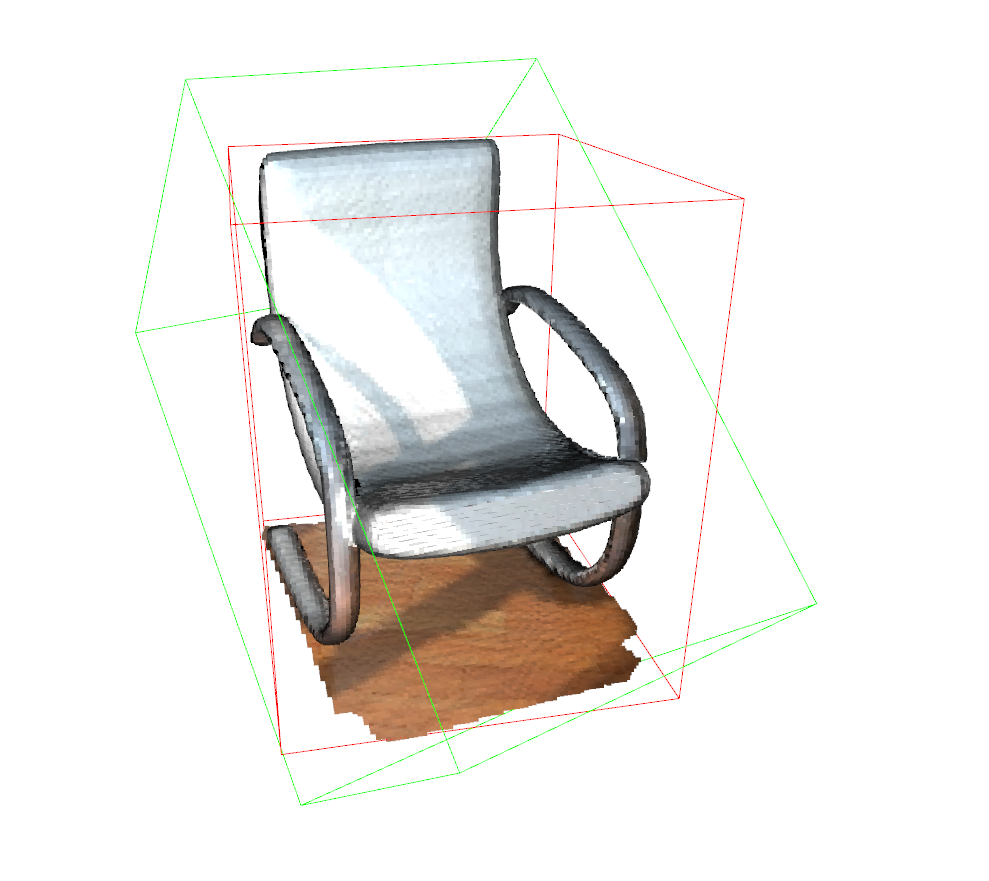

### Convex hull <font color='red'>SKIPPEd

Convex set: ???
something to do with connecting all points with a line?

In [54]:
bunny = o3d.data.BunnyMesh() #return object bynny which is a 3d triangle mesh of a bunny
print(type(bunny))
mesh = o3d.io.read_triangle_mesh(bunny.path) #convert mesh to mesh data?
mesh.compute_vertex_normals() #compute geometry propertiesof  mesh and show



<class 'open3d.cpu.pybind.data.BunnyMesh'>


TriangleMesh with 35947 points and 69451 triangles.

In [55]:

pcl = mesh.sample_points_poisson_disk(number_of_points=2000) 
hull, _ = pcl.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
hull_ls.paint_uniform_color((1, 0, 0))
o3d.visualization.draw_geometries([pcl, hull_ls])


![image.png]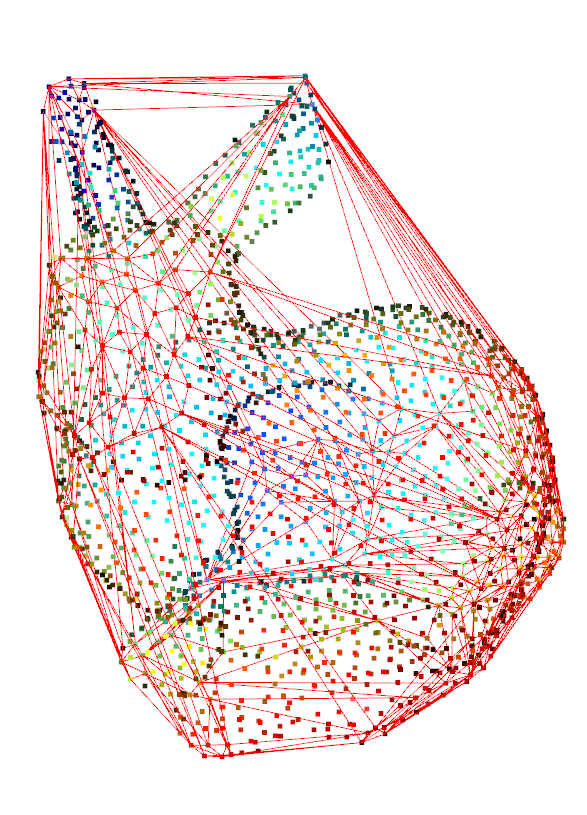


### DBSCAN Clustering

Given a PC, we wana group local PC clusters together
We can use clustering algorithms

DBSCAN(Density-based Spatial Clustering of Applications with Noise)=density based clusting algorithm
algo is in 'cluster_dbscan' and needs 2 inputs: 'eps'=distance to neighboors in cluster
and 'min_points' = min num of points needed to create cluster
func returns 'labels' where '-1' = noise

ie uses point concentration to groupthings

DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density. It groups 'densely grouped' data points into a single cluster.(https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)

In [56]:
import matplotlib.pyplot as plt

ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud(ply_point_cloud.path)

with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(pcd.cluster_dbscan(eps=0.02, min_points=10, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])




[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.                     ] 2%
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 10
Precompute neighbors.[========================================] 100%
point cloud has 10 clusters=======================>] 97%


![image.png]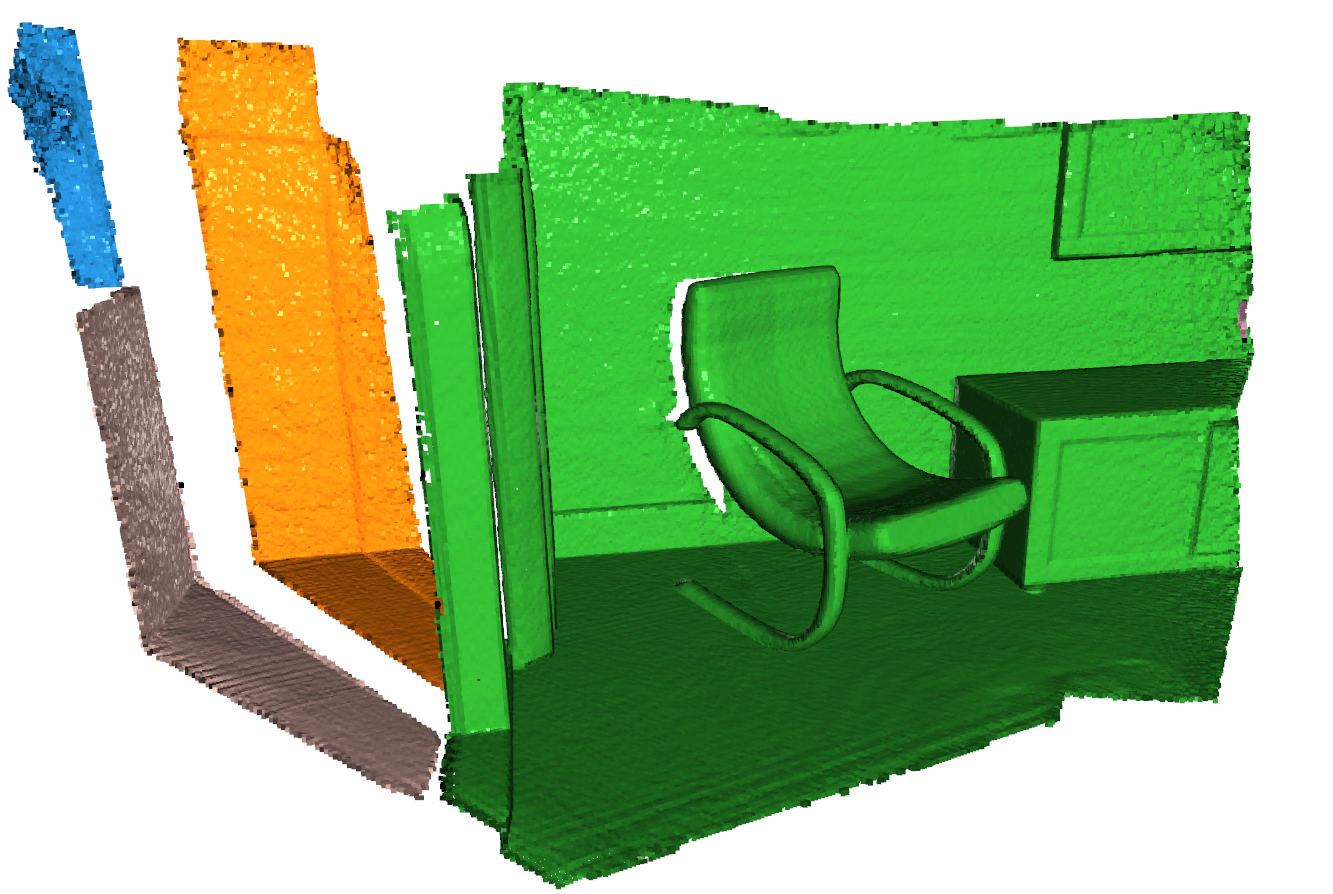

### Plane segmentation

geometric primitives: funcdamental simple geometries like spheres, planes, etc, that would make up a more complex geometry

RANSAC: used to do 'segmentation of geometric primitives'
segmentation as in, dividing point cloud into distinct subsets based on geometric primitives

segment_plane: used to find the plane w/ largesyt support in pointcloud, ie. the plane with the most inliers, so ie the biggest plane

In [57]:
pcd_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud(pcd_point_cloud.path)

plane_model, inliers = pcd.segment_plane(distance_threshold=0.05,ransac_n=3,num_iterations=1000)
#units of dist=units of coords
#first arg=wiggle room dist to consider a point to be an inlier of the plane
#2nd arg=number of sample points that will be randommly selected from the PC to see if they make up a plane
#3rd arg=number of times u check to make sure its a plane?
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

Plane equation: 0.33x + 0.00y + 0.94z + -2.49 = 0


 ![image.png]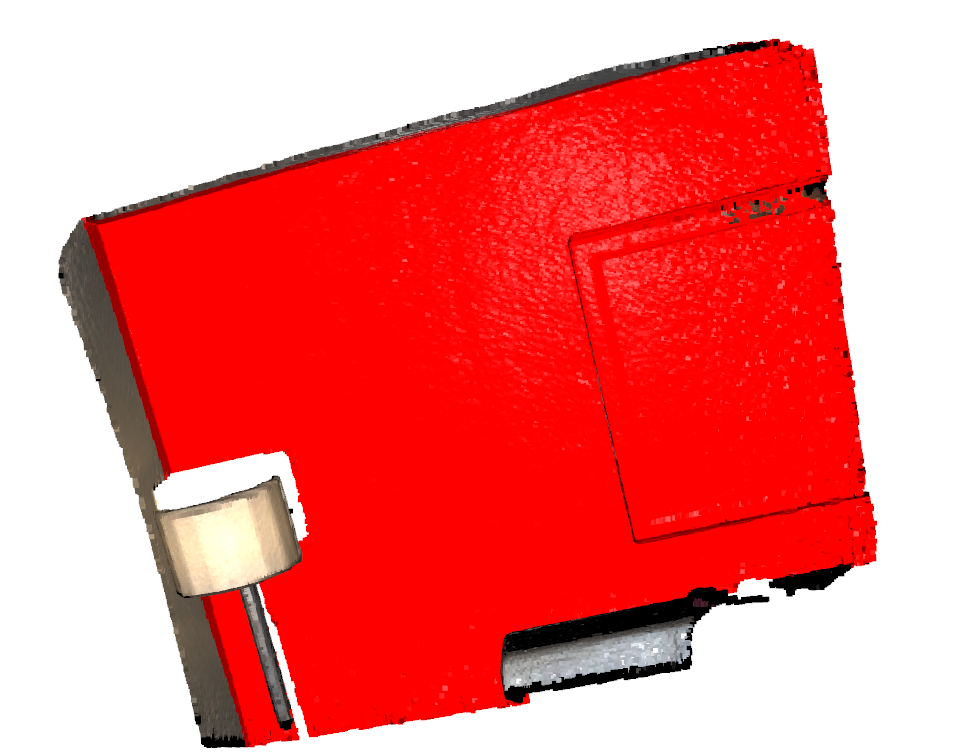

### Planar patch detection

This sect. is in 'planar patch detection' ie seeing all the other planes that are in the PC thhat isnt the big one above.


detect_planar_patches= used to detect planar patches, takes 6 inputs
Inputs
- normal_variance_threshold_deg= variance allowed amongs point normals. Normal variance is a measure of how much surface norms deviate from common dir of plane
- coplanarity_deg = degree of how much the points are coplanar??? idk why it takes units of deg then :(
- outlier_ratio = sets max outlier ratio ? wtvr that is
- min_plane_edge_length = a planar patch's largest edge must be much greater than this value to be considered a true planar patch, used to reject false positives
- min_num_points = 'determines how deep the associated octree becomes and how many points must be present when attempting to fit a plane' idk what this mean
- search_param = is an instance of geometry::KDTreeSearchParam and defaults to geometry::KDTreeSearchParamKNN (idk what this means)
- uhhh idk what the other stuff means

In [78]:
dataset = o3d.data.PCDPointCloud() #get point cloud data
pcd = o3d.io.read_point_cloud(dataset.path) #convert the point clou to point cloud?
assert (pcd.has_normals()) #check if the pointcloud has normals

#detect planar patches
oboxes = pcd.detect_planar_patches(
    normal_variance_threshold_deg=60,
    coplanarity_deg=75,
    outlier_ratio=0.75,
    min_plane_edge_length=0,
    min_num_points=0,
    search_param=o3d.geometry.KDTreeSearchParamKNN(knn=30))

print(type(oboxes))

<class 'list'>


obox=abbr of oriented bounding box, a geometric shap[e that surrounds an object or set of 3d points in space. he box can be rotaed in any direction and is defined by position size and orientation

assert() takes in a boolean and sees if the boolean is true or false. If true, nothing happenes, if false, the function outputs an error called AssertionError

In [79]:
print("Detected {} patches".format(len(oboxes)))

Detected 10 patches


In [85]:
#create empty list called...
geometries=[]
for obox in oboxes: #for every obox in the list of detected oboxes...
    mesh = o3d.geometry.TriangleMesh.create_from_oriented_bounding_box(obox, scale=[1, 1, 0.0001]) #create triangle mesh from obox, idk what the scale is
    mesh.paint_uniform_color(obox.color) #apply uniform color to mesh object, obox.color is just its own color
    geometries.append(mesh) #add the mesh object to the geometries list
    geometries.append(obox) #add the obox to the geometry list, adds original obox to list
geometries.append(pcd) #add original pointcloud to the geometry list

now the 'geometries' list contains the og point cloud, the meshes of each obox, and all the oboxes

In [88]:
o3d.visualization.draw_geometries(geometries)

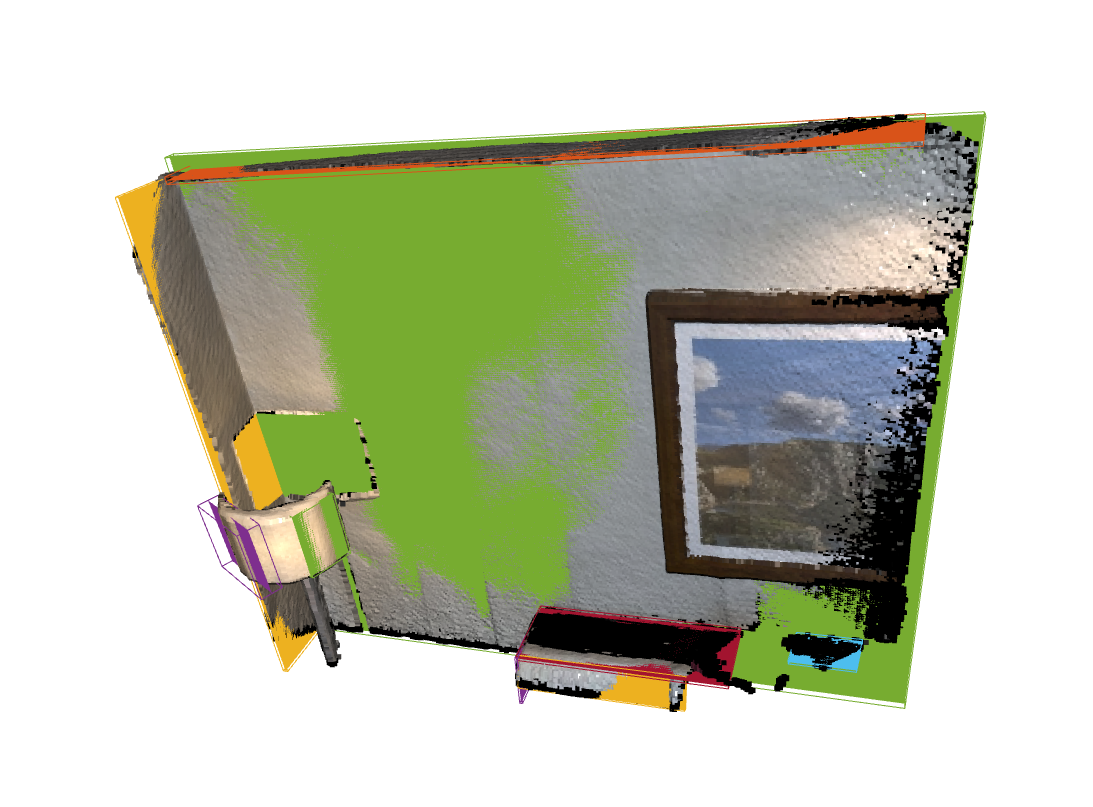

### Hidden Point Removal

Hide points algorithm, to hide the points that make up the backside of a pointcloud object.In Open3D the method by [Katz2007] is implemented that approximates the visibility of a point cloud from a given view without surface reconstruction or normal estimation.

In [92]:
print("Convert mesh to a point cloud and estimate dimensions")
armadillo = o3d.data.ArmadilloMesh()
mesh = o3d.io.read_triangle_mesh(armadillo.path) #read/load triangle mesh made from armadillo mesh
mesh.compute_vertex_normals() #compute the normal vectors of the points that make up the vertices of the mesh


Convert mesh to a point cloud and estimate dimensions


TriangleMesh with 172974 points and 345944 triangles.

In [91]:
pcd = mesh.sample_points_poisson_disk(5000)

generate point cloud from mesh via Poisson Disk Sampling Method
This method ensures that points are evenly distributed across the surface mesh. The input is the # of points u want on the pointcloud


In [94]:
diameter = np.linalg.norm(np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
#get greatest extent/size of the point cloud

np.linalg.norm() is a fun. that determines the norm/length of a vector or the magnitude of a matrix. Norm of a vector = vector length in space

np.asarray(pcd.get_???_bound()) gets the max/min bound of the point cloud and convert it to a numpy array


In [96]:
o3d.visualization.draw_geometries([pcd]) #display point cloud of armadillo

 <font color='red'>Revisit

In [101]:
#Ok i rushed this bit of the code, revisit!!!!!!!

print("Define parameters used for hidden_point_removal")
camera = [0, 0, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
pcd = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd])

Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result


## §2 Point Cloud outlier removal

A pointcloud is loaded and downsampled using 'voxel_downsample'

In [7]:
print('Load a ply point cloud, print it, and render it')
sample_pcd_data=o3d.data.PCDPointCloud() #get point cloud data?
pcd=o3d.io.read_point_cloud(sample_pcd_data.path) #access and ready the point cloud?
o3d.visualization.draw_geometries([pcd]) #visualize the point cloud known as pcd

Load a ply point cloud, print it, and render it


In [8]:
print('downsample the point cloud with a voxel of size 0.02')

downsample the point cloud with a voxel of size 0.02


In [14]:
voxel_down_pcd=pcd.voxel_down_sample(voxel_size=0.02)

In [15]:
o3d.visualization.draw_geometries([voxel_down_pcd]) #display the new point cloud

We can also use 'uniform_down_sample' to downsample the point cloud by collecting every n-th points

In [18]:
print('every 5th points are selescted')
uni_down_pcd=pcd.uniform_down_sample(every_k_points=5) #downsample with this new method
o3d.visualization.draw_geometries([uni_down_pcd])

every 5th points are selescted


### (minor section)Select down sample

In [45]:
# this user defined function is used to display the chosen and not chosen 
def display_inlier_outlier(cloud,ind):
    inlier_cloud=cloud.select_by_index(ind) #ind stands for indices
    outlier_cloud=cloud.select_by_index(ind, invert=True)

    print('showing outliers(red) and inliers (gray):')
    outlier_cloud.paint_uniform_color([1,0,0])
    inlier_cloud.paint_uniform_color([.8,.8,.8])
    o3d.visualization.draw_geometries([inlier_cloud,outlier_cloud])


select_by_index() takes an original geometry and a list of indices and returns a new geometry object containing only the selected elements based on the provided indices.

eg
selected_geometry=original_geometry.select_by_index(indices, invert=False)
where...
original_geometry=og geometry that u want to select elements from
indices=an array ot list of indices that you want to select. The elements corresponding to these indices in the og geometry will be included in the new geometry
invert=optional, if true, select all elements except those specified by the indices, if false, do the opposit.

lets say a point cloud has 10 points, and u want to select the points at indeces 2, 5, and 8. The input for 'indices' would be a list or array containing this
indices=[2,5,8]. using the 'select_by_index()' function with this will create a new pointcloud containing only the points with indices 2,5, and 8 :)

### Statistical outlier removal

In [25]:
print('statistical outlier removal')
cl , ind = voxel_down_pcd.remove_statistical_outlier(nb_neighbors=20,std_ratio=2.0)
display_inlier_outlier(voxel_down_pcd, ind)

statistical outlier removal
showing outliers(red) and inliers (gray):


cl , ind = voxel_down_pcd.remove_statistical_outlier(nb_neighbors=20,std_ratio=2.0): This line applies the statistical outlier removal algorithm to the point cloud voxel_down_pcd. The algorithm identifies and removes outliers based on the statistical distribution of point distances within their local neighborhoods. The nb_neighbors parameter specifies the number of neighbors used for determining the local statistics, and the std_ratio parameter controls the threshold for identifying outliers. The function returns two values: cl is the point cloud after removing outliers, and ind is an index array indicating which points were considered outliers. (chtgpt)

### Radius outlier removal

radius_outlier_removal: removes points that have few neighbors in a given sphere around them.

2 parameters:
- nb_points: min amount of points the sphere contains
- radius: radius of the sphere


In [32]:
print('Radius outlier removal')
cl,ind=voxel_down_pcd.remove_radius_outlier(nb_points=16, radius=0.05)
display_inlier_outlier(voxel_down_pcd, ind)


Radius outlier removal
showing outliers(red) and inliers (gray):


### Actually removing it

In [44]:
#Gain access and ready your specified pointcloud
ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud(ply_point_cloud.path)

#See og point cloud
print('Raw Point Cloud')
o3d.visualization.draw_geometries([pcd])

#Down Sample via Voxels
print('Voxel Downsampling')
voxel_down_pcd=pcd.voxel_down_sample(voxel_size=0.02)
o3d.visualization.draw_geometries([voxel_down_pcd])

#Down Sample via Periodic Choosing (every nth datum)
print('Periodic Downsampling')
uni_down_pcd=pcd.uniform_down_sample(every_k_points=5)
o3d.visualization.draw_geometries([uni_down_pcd])


Raw Point Cloud
Voxel Downsampling
Periodic Downsampling


In [51]:
#Selecting and Displaying Data
def display_inlier(cloud,ind):
    inlier_cloud=cloud.select_by_index(ind)

    print('showing point cloud with noise removal')
    o3d.visualization.draw_geometries([inlier_cloud])

In [55]:
#Noise Removal via Statistics
#replace 'voxel_down_pcd' with wtvr point cloud u want to noise reduce
cl , ind = voxel_down_pcd.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)
display_inlier(voxel_down_pcd, ind)

#Noise Removal via Radius
cl, ind=voxel_down_pcd.remove_radius_outlier(nb_points=16, radius=0.05)
display_inlier(voxel_down_pcd, ind)


showing point cloud with noise removal
showing point cloud with noise removal


## §3 Meshes

### misc

In [6]:
import numpy as np
import open3d as o3d
print('testing mesh in open3d')
armadillo_mesh=o3d.data.ArmadilloMesh() #get mesh triangle mesh data of armadillo
mesh=o3d.io.read_triangle_mesh(armadillo_mesh.path) #given file path to the armadillo mesh data, read and hold the mesh data in var mesh
print(mesh) #print mesh geometric information

knot_mesh=o3d.data.KnotMesh() # get triangle mesh data of a knot
mesh=o3d.io.read_triangle_mesh(knot_mesh.path) #given file path to the knot mesh data, read and hold the mesh data in var mesh
print(mesh)#print mesh geometric information

print('vertices:')
print(np.asarray(mesh.vertices)) #display 3d coords of vertices
print('triangles')
print(np.asarray(mesh.triangles))

testing mesh in open3d
TriangleMesh with 172974 points and 345944 triangles.
TriangleMesh with 1440 points and 2880 triangles.
vertices:
[[  4.51268387  28.68865967 -76.55680847]
 [  7.63622284  35.52046967 -69.78063965]
 [  6.21986008  44.22465134 -64.82303619]
 ...
 [-22.12651634  31.28466606 -87.37570953]
 [-13.91188431  25.4865818  -86.25827026]
 [ -5.27768707  23.36245346 -81.43279266]]
triangles
[[   0   12   13]
 [   0   13    1]
 [   1   13   14]
 ...
 [1438   11 1439]
 [1439   11    0]
 [1439    0 1428]]


### Mesh Vizualization (w/o surface normals)

In [9]:
print("Try to render a mesh with normals (exist: " +
      str(mesh.has_vertex_normals()) + ") and colors (exist: " +
      str(mesh.has_vertex_colors()) + ")")

Try to render a mesh with normals (exist: False) and colors (exist: False)


In [13]:
o3d.visualization.draw_geometries([mesh])
#visualize the mesh

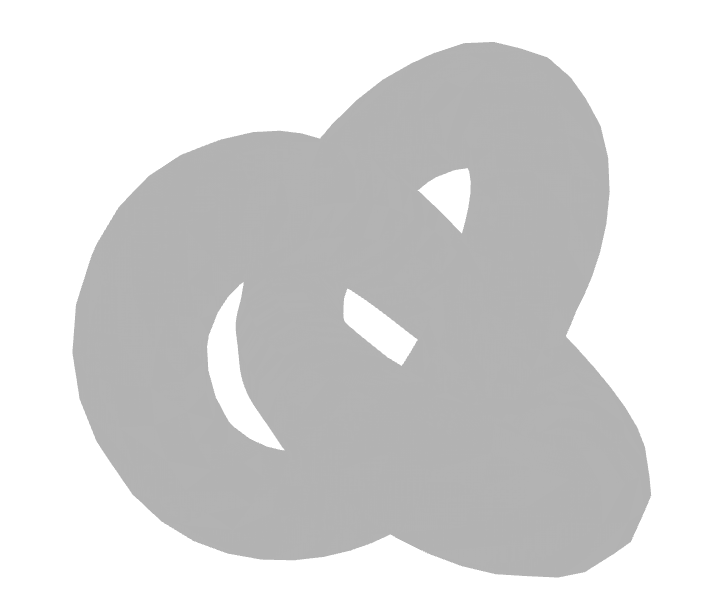

- str(mesh.has_vertex_normals()): This retrieves whether the mesh has vertex normals and converts the result to a string.
- str(mesh.has_vertex_colors()): This retrieves whether the mesh has vertex colors and converts the result to a string.

### Mesh Vizualization (w/ surface normals)

In [15]:
print('computing normal surfaces')
mesh.compute_vertex_normals()

computing normal surfaces


TriangleMesh with 1440 points and 2880 triangles.

In [16]:
print("Normals (exist: " +
      str(mesh.has_vertex_normals()) + ") and Colors (exist: " +
      str(mesh.has_vertex_colors()) + ")")

Normals (exist: True) and Colors (exist: False)


In [21]:
print(np.asarray(mesh.triangle_normals)) #print the triangle normal vectors
o3d.visualization.draw_geometries([mesh])

[[ 0.79164373 -0.53951444  0.28674793]
 [ 0.8319824  -0.53303008  0.15389681]
 [ 0.83488162 -0.09250101  0.54260136]
 ...
 [ 0.16269924 -0.76215917 -0.6266118 ]
 [ 0.52755226 -0.83707495 -0.14489352]
 [ 0.56778973 -0.76467734 -0.30476777]]


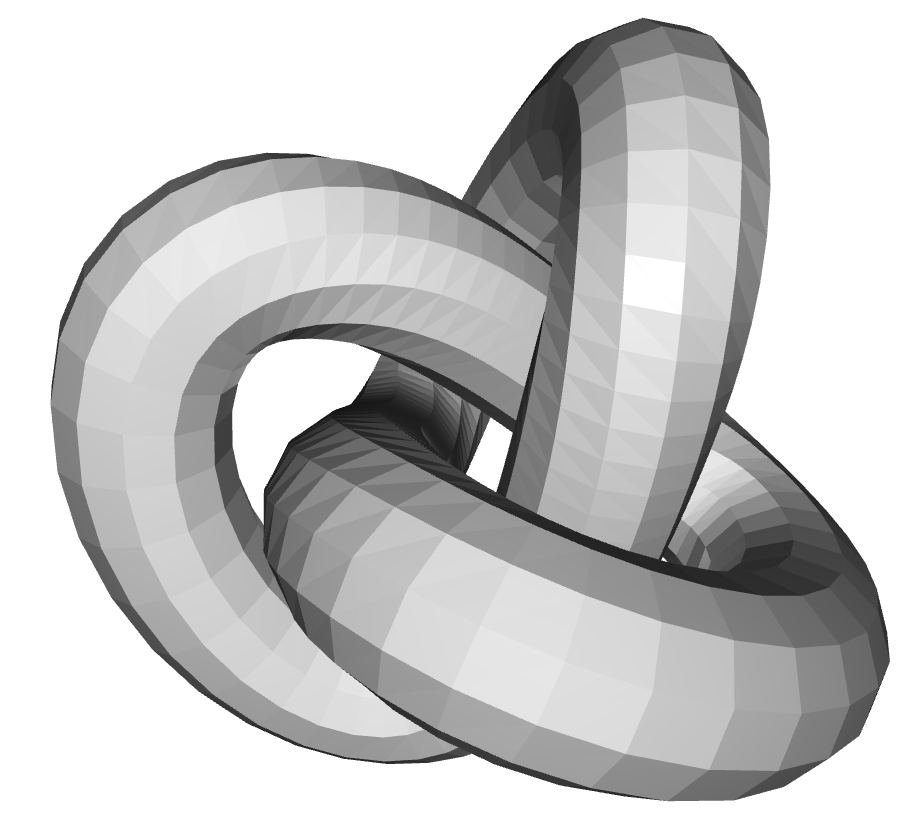

### Mesh Cropping (via omitting the first half of the set of normal surfaces, i think)

In [68]:
print("we'll make a partial mesh of only the first half triangles")
import copy
mesh1=copy.deepcopy(mesh)
o3d.visualization.draw_geometries([mesh1])


we'll make a partial mesh of only the first half triangles


for things as complex as meshes, u can make a superficial copy of the mesh, or a deep copy. deep copy includes any references the file makes or dependencies it has.

In [69]:

#I dont really know how this block of code works
mesh1.triangles = o3d.utility.Vector3iVector(
    np.asarray(mesh1.triangles)[:len(mesh1.triangles) // 2, :])
mesh1.triangle_normals = o3d.utility.Vector3dVector(
    np.asarray(mesh1.triangle_normals)[:len(mesh1.triangle_normals) // 2, :])

print(mesh.triangles)
o3d.visualization.draw_geometries([mesh1])

std::vector<Eigen::Vector3i> with 2880 elements.
Use numpy.asarray() to access data.


- [:len(mesh1.triangles) // 2, :]: Slices the array to keep only the first half of the triangles.
- len(mesh1.triangles) // 2 calculates half of the total number of triangles.

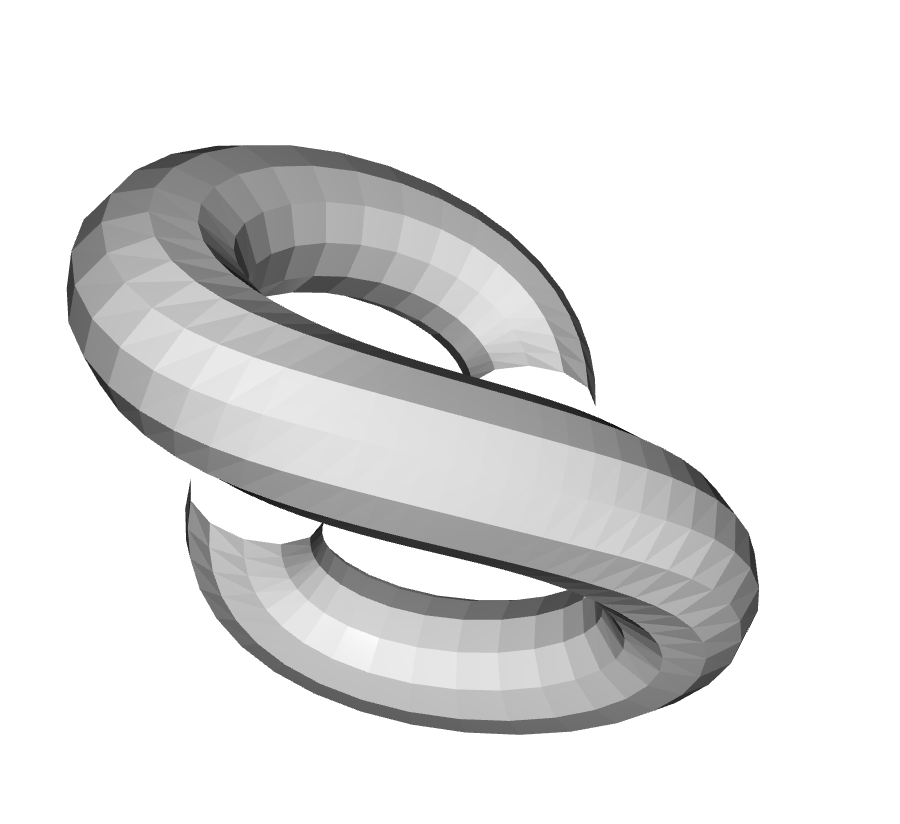

### Mesh Painting

In [70]:
print('paint mesh')
mesh1.paint_uniform_color([1,0.706,.25])
o3d.visualization.draw_geometries([mesh1])

paint mesh


### Mesh Properties <span style="color:red">!!</span>

A triangle mesh is...
- ...**edge manifold**, if each edge is bounding either 1 or 2 traingles
- ...**vertex manifold**, if the star of the vertex is edge-manifold and edge-connected (2 or more faces are connected by a vertex and not by an edge)


A mesh is __self intersecting__ if it has intersecting triangles
A mesh is __water tight__ if it's edge manifold + vertex manifold + not self intersecting

A mesh is __orientable__ if its triangles can be oriented so that all normals are outgoing

In [80]:
#A function used to test properties and visualize the results
def check_properties(name, mesh):
    mesh.compute_vertex_normals()

    edge_manifold = mesh.is_edge_manifold(allow_boundary_edges=True)
    edge_manifold_boundary = mesh.is_edge_manifold(allow_boundary_edges=False)
    vertex_manifold = mesh.is_vertex_manifold()
    self_intersecting = mesh.is_self_intersecting()
    watertight = mesh.is_watertight()
    orientable = mesh.is_orientable()

    print(name)
    print(f"  edge_manifold:          {edge_manifold}")
    print(f"  edge_manifold_boundary: {edge_manifold_boundary}")
    print(f"  vertex_manifold:        {vertex_manifold}")
    print(f"  self_intersecting:      {self_intersecting}")
    print(f"  watertight:             {watertight}")
    print(f"  orientable:             {orientable}")

    geoms = [mesh]
    if not edge_manifold:
        edges = mesh.get_non_manifold_edges(allow_boundary_edges=True)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (1, 0, 0)))
    if not edge_manifold_boundary:
        edges = mesh.get_non_manifold_edges(allow_boundary_edges=False)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (0, 1, 0)))
    if not vertex_manifold:
        verts = np.asarray(mesh.get_non_manifold_vertices())
        pcl = o3d.geometry.PointCloud(
            points=o3d.utility.Vector3dVector(np.asarray(mesh.vertices)[verts]))
        pcl.paint_uniform_color((0, 0, 1))
        geoms.append(pcl)
    if self_intersecting:
        intersecting_triangles = np.asarray(
            mesh.get_self_intersecting_triangles())
        intersecting_triangles = intersecting_triangles[0:1]
        intersecting_triangles = np.unique(intersecting_triangles)
        print("  # visualize self-intersecting triangles")
        triangles = np.asarray(mesh.triangles)[intersecting_triangles]
        edges = [
            np.vstack((triangles[:, i], triangles[:, j]))
            for i, j in [(0, 1), (1, 2), (2, 0)]
        ]
        edges = np.hstack(edges).T
        edges = o3d.utility.Vector2iVector(edges)
        geoms.append(o3dtut.edges_to_lineset(mesh, edges, (1, 0, 1)))
    o3d.visualization.draw_geometries(geoms, mesh_show_back_face=True)

In [93]:

knot_mesh_data = o3d.data.KnotMesh()
knot_mesh = o3d.io.read_triangle_mesh(knot_mesh_data.path)
check_properties('KnotMesh', knot_mesh)


KnotMesh
  edge_manifold:          True
  edge_manifold_boundary: True
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             True
  orientable:             True


In [94]:

bunny_mesh_data = o3d.data.BunnyMesh()
bunny_mesh=o3d.io.read_triangle_mesh(bunny_mesh_data.path)


BunnyMesh
  edge_manifold:          True
  edge_manifold_boundary: False
  vertex_manifold:        True
  self_intersecting:      False
  watertight:             False
  orientable:             True


NameError: name 'o3dtut' is not defined

I think the library needed to do the above part no longer exists: https://github.com/isl-org/Open3D/blob/master/examples/Python/open3d_tutorial.py


In [ ]:
armadillo_mesh=o3d.data.ArmadilloMesh() #get mesh triangle mesh data of armadillo
mesh=o3d.io.read_triangle_mesh(armadillo_mesh.path) #given file path to the armadillo mesh data, read and hold the mesh data in var mesh
print(mesh) #print mesh geometric information

### Mesh Filtering


Denoising meshes


The parameter 'number_of_iterations' in the function 'filter_smooth_simple' defines how often the filter is applied to the mesh.

This filtering uses __average filtering__ where the new vertex is given by the mean of the adjacent vertices

In [100]:
print('create noisy mesh')
knot_mesh=o3d.data.KnotMesh()
mesh_in=o3d.io.read_triangle_mesh(knot_mesh.path)

vertices=np.asarray(mesh_in.vertices)
noise=5
vertices += np.random.uniform(0,noise,size=vertices.shape)

mesh_in.vertices=o3d.utility.Vector3dVector(vertices)
mesh_in.compute_vertex_normals()

o3d.visualization.draw_geometries([mesh_in])


create noisy mesh


In [101]:
print('filter with average with 1 iteration')
mesh_out = mesh_in.filter_smooth_simple(number_of_iterations=1)
mesh_out.compute_vertex_normals()

o3d.visualization.draw_geometries([mesh_out])


filter with average with 1 iteration


In [102]:

print('filter with average with 5 iterations')
mesh_out = mesh_in.filter_smooth_simple(number_of_iterations=5)
mesh_out.compute_vertex_normals()

o3d.visualization.draw_geometries([mesh_out])


filter with average with 5 iterations


This filtering uses __laplacian filtering__
